# Loading file from previous code

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

# Model Building

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model Training

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.6730

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


86/86 [==============================] - 122s 1s/step - loss: 0.5985 - accuracy: 0.6730 - val_loss: 0.4291 - val_accuracy: 0.8090
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.8257

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


86/86 [==============================] - 127s 1s/step - loss: 0.3767 - accuracy: 0.8257 - val_loss: 0.3043 - val_accuracy: 0.8746
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.2831 - accuracy: 0.8833

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


86/86 [==============================] - 121s 1s/step - loss: 0.2831 - accuracy: 0.8833 - val_loss: 0.2759 - val_accuracy: 0.8878
Epoch 4/20
86/86 [==============================] - 123s 1s/step - loss: 0.2287 - accuracy: 0.9078 - val_loss: 0.3404 - val_accuracy: 0.8615
Epoch 5/20
86/86 [==============================] - ETA: 0s - loss: 0.2171 - accuracy: 0.9125

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


86/86 [==============================] - 118s 1s/step - loss: 0.2171 - accuracy: 0.9125 - val_loss: 0.2754 - val_accuracy: 0.8892
Epoch 6/20
86/86 [==============================] - ETA: 0s - loss: 0.1524 - accuracy: 0.9398

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


86/86 [==============================] - 117s 1s/step - loss: 0.1524 - accuracy: 0.9398 - val_loss: 0.2237 - val_accuracy: 0.9125
Epoch 7/20
86/86 [==============================] - 114s 1s/step - loss: 0.1162 - accuracy: 0.9519 - val_loss: 0.2537 - val_accuracy: 0.9140
Epoch 8/20
86/86 [==============================] - 114s 1s/step - loss: 0.0894 - accuracy: 0.9654 - val_loss: 0.2357 - val_accuracy: 0.9213
Epoch 9/20
86/86 [==============================] - 124s 1s/step - loss: 0.0655 - accuracy: 0.9756 - val_loss: 0.2400 - val_accuracy: 0.9227
Epoch 10/20
86/86 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9712

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


86/86 [==============================] - 112s 1s/step - loss: 0.0742 - accuracy: 0.9712 - val_loss: 0.2118 - val_accuracy: 0.9257
Epoch 11/20
86/86 [==============================] - 117s 1s/step - loss: 0.0493 - accuracy: 0.9818 - val_loss: 0.2431 - val_accuracy: 0.9184
Epoch 12/20
86/86 [==============================] - 118s 1s/step - loss: 0.0492 - accuracy: 0.9829 - val_loss: 0.2526 - val_accuracy: 0.9286
Epoch 13/20
86/86 [==============================] - 129s 2s/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.2224 - val_accuracy: 0.9344
Epoch 14/20
86/86 [==============================] - 126s 1s/step - loss: 0.0281 - accuracy: 0.9938 - val_loss: 0.2509 - val_accuracy: 0.9300
Epoch 15/20
86/86 [==============================] - 122s 1s/step - loss: 0.0300 - accuracy: 0.9931 - val_loss: 0.2453 - val_accuracy: 0.9329
Epoch 16/20
86/86 [==============================] - 124s 1s/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.2648 - val_accuracy: 0.9359
Epoch 17/20
86/86 

# Graph of loss

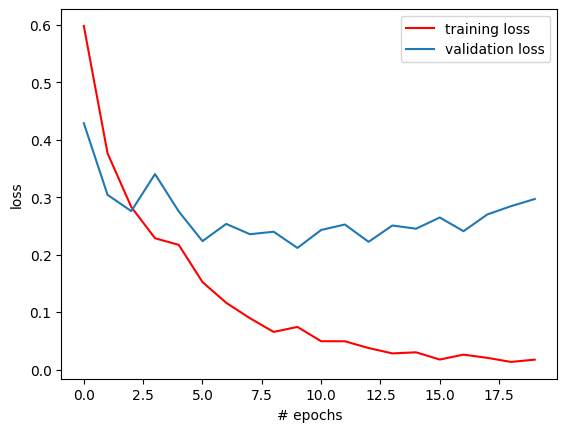

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Graph of Accuracy

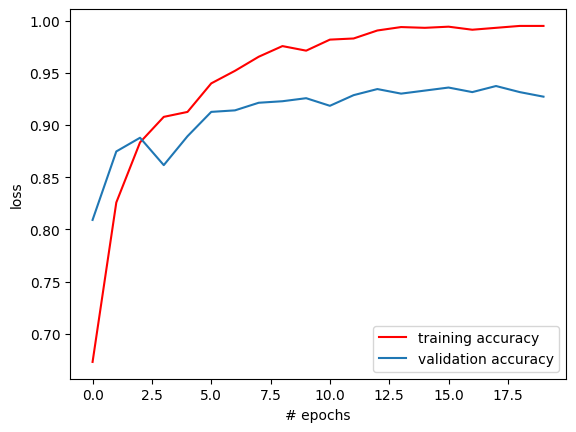

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test Accuracy

In [20]:
from keras.models import load_model
best_model = load_model('model-008.model') 
y_pred = best_model.predict(test_data)
accuracy = best_model.evaluate(test_data, test_target)[1]
print('Test Accuracy:', accuracy)

12/12 [==============================] - 4s 329ms/step - loss: 0.1176 - accuracy: 0.9606
Test Accuracy: 0.960629940032959


# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
# Make predictions on test data
predictions = model.predict(test_data)
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert test target to class labels
true_labels = np.argmax(test_target, axis=1)
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

12/12 [==============================] - 3s 272ms/step
[[170  14]
 [ 14 183]]


# Classification Report

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(
      np.argmax(model.predict(test_data), axis=1), 
      np.argmax(test_target, axis = 1)
     )
print(cr)

12/12 [==============================] - 3s 269ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       184
           1       0.93      0.93      0.93       197

    accuracy                           0.93       381
   macro avg       0.93      0.93      0.93       381
weighted avg       0.93      0.93      0.93       381



# Model Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    